In [1]:
#Module usefull for extraction data
from modules.LoggerManager import LoggerManager
import pandas as pd
from modules.MarketDataManager import MarketDataManager

c:\Users\ichak\.conda\envs\cryptosv2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Create Market and download data from config
myExchange = MarketDataManager(exchange_name="binance")
# await myExchange.download_data(intervals=[], coins=[], start_date="2024-01-01 00:00:00")

In [4]:
df = myExchange.load_data_from_csv_db(coin_pair="GRT-USDT", interval_name='1h', start_date="2024-01-25 00:00:00")
df

d:\_WS_Developpement\Bots\F_CryptoBotV2\modules\MarketDataManager.py:280: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(target_file_name, index_col=0, parse_dates=True)


,open,high,low,close,volume
date,,,,,
2024-01-25 00:00:00,0.1531,0.1532,0.1518,0.1525,1609202.0
2024-01-25 01:00:00,0.1526,0.1526,0.1500,0.1501,1023619.0
2024-01-25 02:00:00,0.1501,0.1508,0.1493,0.1495,561281.0
2024-01-25 03:00:00,0.1495,0.1509,0.1495,0.1500,664113.0
2024-01-25 04:00:00,0.1500,0.1508,0.1493,0.1497,876847.0
...,...,...,...,...,...
2024-02-10 16:00:00,0.1715,0.1717,0.1702,0.1710,3978499.0
2024-02-10 17:00:00,0.1710,0.1720,0.1706,0.1718,1717696.0
2024-02-10 18:00:00,0.1718,0.1721,0.1714,0.1717,1898075.0


In [5]:
df_flags=df.copy()
df_flags['flags'] = ''
df_flags.loc[(df_flags['close'] > df_flags['close'].shift(1)) & (df_flags['close'].shift(1) > df_flags['close'].shift(2)), 'flags'] = '2'
df_flags.loc[(df_flags['close'] < df_flags['close'].shift(1)) & (df_flags['close'].shift(1) < df_flags['close'].shift(2)), 'flags'] = '.'
df_flags['flags'].value_counts()
marker = df_flags['flags'].to_list()

flags
     232
.     87
2     86
Name: count, dtype: int64

In [6]:
marker = df_flags['flags'].to_list()

In [7]:
from modules.DisplayTools import DisplayToolsBox
tool = DisplayToolsBox()

In [8]:
df

,open,high,low,close,volume
date,,,,,
2024-01-25 00:00:00,0.1531,0.1532,0.1518,0.1525,1609202.0
2024-01-25 01:00:00,0.1526,0.1526,0.1500,0.1501,1023619.0
2024-01-25 02:00:00,0.1501,0.1508,0.1493,0.1495,561281.0
2024-01-25 03:00:00,0.1495,0.1509,0.1495,0.1500,664113.0
2024-01-25 04:00:00,0.1500,0.1508,0.1493,0.1497,876847.0
...,...,...,...,...,...
2024-02-10 16:00:00,0.1715,0.1717,0.1702,0.1710,3978499.0
2024-02-10 17:00:00,0.1710,0.1720,0.1706,0.1718,1717696.0
2024-02-10 18:00:00,0.1718,0.1721,0.1714,0.1717,1898075.0


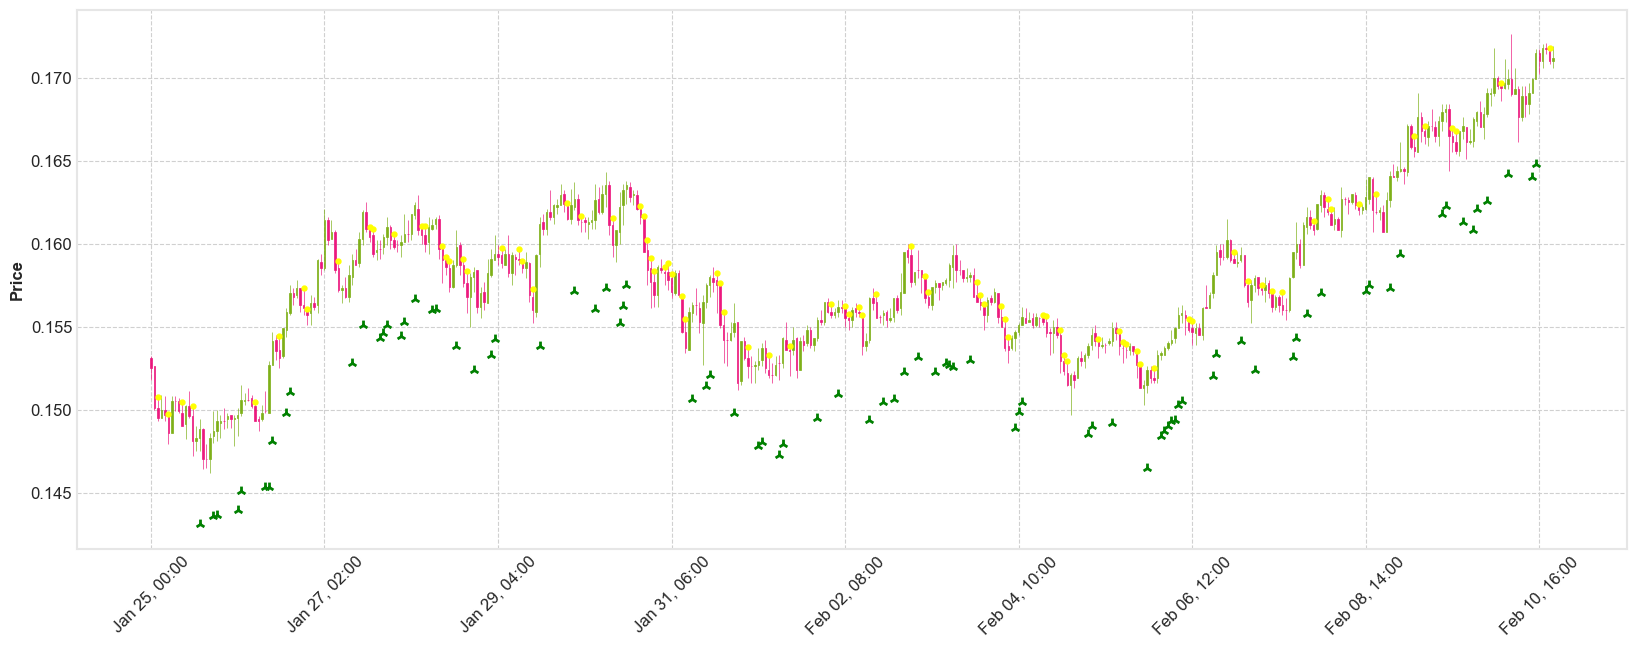

In [9]:
tool.plot_candle_pattern(df=df, flags=marker, marker_zoom=0.03)

In [ ]:
list = [4,6,4,2,8]

In [ ]:
for n in list:
    print(list.index(n))

In [ ]:
for position, valeur in enumerate(list):
    print(f"L'élément {valeur} se trouve à la position {position}")